<h1>Citibike Network Assignment</h1>
<li>The file, 2014-01 - Citi Bike trip data.csv, contains citibike trip data from January 2014 (a reasonable sized file!)
<li>The data:<br>
"tripduration","starttime","stoptime","start station id","start station name","start station latitude","start station longitude","end station id","end station name","end station latitude","end station longitude","bikeid","usertype","birth year","gender"
<li>Each record in the data is a trip 
<li>The data is described at https://www.citibikenyc.com/system-data

<h1>STEP 1: Read the data into a dataframe</h1>
<li>Convert station ids to str if necessary

In [1]:
import pandas as pd
import numpy as np
path = r"C:\Users\Daniel Yao\Documents\Emilia\Documents\Columbia MSBA\Fall 2018\E4523 - Data Analytics\HW Assignments\2014-01+-+Citi+Bike+trip+data.csv"
with open(path):
    df = pd.read_csv(path, dtype={'start station id':object,'end station id':object})

<h1>STEP 2: Basic cleaning</h1>
<li>Remove data that have any nans in any row (none in this file but others do have nans)
<li>and convert stationids to str 

In [33]:
df.dropna(inplace=True)
# df.drop(columns=['start station latitude','start station longitude',
#                  'end station latitude','end station longitude',
#                  'bikeid','usertype','birth year'],inplace=True)

In [ ]:
# import networkx as nx
# %matplotlib inline
# G = nx.Graph()
# node_names = dict()

# #create node_names dictionary, nodes list, and edges list
# import numpy as np
# node_names = dict(zip([x for x in np.unique(df[['start station id','end station id']])],
#                       [x for x in np.unique(df[['start station name','end station name']])]))
# node = list(node_names.keys())
# node_labels = list(node_names.values())
# edges = list(map(lambda x,y:(x,y),[a for a in df['start station id']],[b for b in df['end station id']]))
# distances = list(map(lambda x,y,z:(x,y,z),
#                      [a for a in df['start station id']],
#                      [b for b in df['end station id']],
#                      [c for c in df['tripduration']]))

# for i in distances:
#     G.add_edge(i[0],i[1],distance=i[2])
# pos=nx.spring_layout(G)  
# nx.draw_networkx_nodes(G,pos,
#                        node_color='r',
#                        node_size=400,
#                       alpha=0.6)
# nx.draw_networkx_edges(G,pos,
#                        edgelist=G.edges(),
#                        width=8,alpha=0.3,edge_color='b')
# nx.draw_networkx_edge_labels(G,pos,font_size=6)
# nx.draw_networkx_labels(G,pos,font_size=8)

# nx.draw(G)

<h1>STEP 3: Write a function that returns a graph given a citibike data frame</h1> 
<li>Your function should return two things:
<ol>
<li>a graph
<li>a dictionary with station ids as the key and station name as the value
</ol>
<li>The graph should contain 
<ol>
<li>nodes (station ids)
<li>edges (station id, station id)
<li>edge data 
<ol>
<li>count: number of trips on the edge
<li>time: average duration - pickup to dropoff - on that edge
</ol>
</ol>
<li><b>Note:</b> the edge (x1,y1) is the same as (y1,x1) even though the start station ids and end station ids are flipped in the dataframe

In [2]:
node_names = dict(zip([x for x in np.unique(df[['start station id','end station id']])],
                      [x for x in np.unique(df[['start station name','end station name']])]))

In [3]:
def get_citibike_graph(df):    
    import networkx as nx
    %matplotlib inline
    G = nx.Graph()
    node_names = dict()

    #create node_names dictionary, nodes list, and edges list
    import numpy as np
    node_names = dict(zip([x for x in np.unique(df[['start station id','end station id']])],
                          [x for x in np.unique(df[['start station name','end station name']])]))
    node = list(node_names.keys())
    node_labels = list(node_names.values())
    edges = list(map(lambda x,y:(x,y),[a for a in df['start station id']],[b for b in df['end station id']]))
    distances = list(map(lambda x,y,z:(x,y,z),
                         [a for a in df['start station id']],
                         [b for b in df['end station id']],
                         [c for c in df['tripduration']]))
    for i in distances:
        G.add_edge(i[0],i[1],distance=i[2])
    return G,node_names 

<h1>STEP 4: Create the following graphs using the function above</h1>
<li>G: A graph of all the data in the dataframe
<li>m_G: A graph containing only data from male riders
<li>f_G: A graph containing only data from female riders
<li>Note: for m_G and f_G you will need to extract data from the dataframe

In [4]:
%matplotlib inline
G,nodes=get_citibike_graph(df)

In [6]:
import networkx as nx

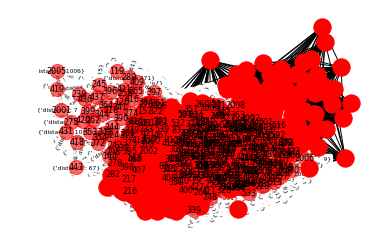

In [8]:
pos=nx.spring_layout(G)  
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=200,
                      alpha=0.6)
nx.draw_networkx_edges(G,pos,
                       edgelist=G.edges(),
                       width=8,alpha=0.3,edge_color='b')
nx.draw_networkx_edge_labels(G,pos,font_size=6)
nx.draw_networkx_labels(G,pos,font_size=8)
nodes_for_removal = [ n for n in G.nodes() if G.degree(n)==0]
for node in nodes_for_removal:
    G.remove_node(node)
nx.draw(G)

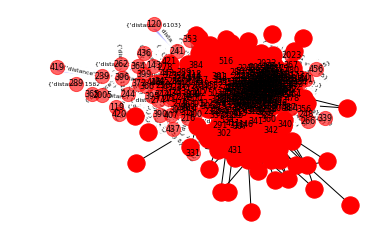

In [11]:
df_m = df[df['gender']==0]
M,nodes=get_citibike_graph(df_m)
pos=nx.spring_layout(M)  
nx.draw_networkx_nodes(M,pos,
                       node_color='r',
                       node_size=200,
                      alpha=0.6)
nx.draw_networkx_edges(M,pos,
                       edgelist=M.edges(),
                       width=8,alpha=0.3,edge_color='b')
nx.draw_networkx_edge_labels(M,pos,font_size=6)
nx.draw_networkx_labels(M,pos,font_size=8)
nodes_for_removalM = [ n for n in M.nodes() if M.degree(n)==0]
for node in nodes_for_removal:
    M.remove_node(node)
nx.draw(M)

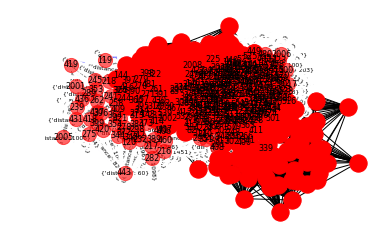

In [13]:
df_f = df[df['gender']==1]
F,nodes=get_citibike_graph(df_f)
pos=nx.spring_layout(F)  
nx.draw_networkx_nodes(F,pos,
                       node_color='r',
                       node_size=200,
                      alpha=0.6)
nx.draw_networkx_edges(F,pos,
                       edgelist=F.edges(),
                       width=8,alpha=0.3,edge_color='b')
nx.draw_networkx_edge_labels(F,pos,font_size=6)
nx.draw_networkx_labels(F,pos,font_size=8)
nodes_for_removalF = [ n for n in F.nodes() if F.degree(n)==0]
for node in nodes_for_removal:
    F.remove_node(node)
nx.draw(F)

<h1>STEP 5: Answer the following questions for each of the graphs</h1>
<ol>
<li>Which station (name) is the best connected (max degree)?
<li>Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs. Report both the two stations as well as the time in minutes
<li>Which edge is associated with the most number of trips?
<li>Which station is the most central?
<li>Which node is a bottleneck node?

Which station (name) has the greatest number of connections (max degree)?

In [14]:
from networkx.algorithms import closeness_centrality
from networkx.algorithms import communicability

In [17]:
d=nx.degree(G)
l=list(d)
p=max(l,key=lambda x: x[1])[0]
print(node_names[p])

E 37 St & Lexington Ave


Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs

In [ ]:
#Note: I've printed the max edges but you don't need to print them

Which edge is associated with the most number of trips?

In [28]:
d=nx.clustering(G)
l=list(d)
p=str(max(l,key=lambda x: x[1]))
print(node_names[p])

E 11 St & 2 Ave


<h2>Centrality</h2>
One of the concerns that the citibike system has to deal with is ensuring that no station has empty slots (a bike should always be available) and that no station should have no empty slots (you should be able to return a bike). To do this, it needs to monitor the movement of bikes through the system, ideally using a directed graph. Though our graph is not directed, we can look at some network characteristics that will help us answer these questions. Note that the "trips" feature in edge data captures flows.
<li>Which node is a possible bottleneck node in terms of bike flows?
<li>Which node is the "nearest" to all other nodes (irrespective of flows)
<li>Which node is the "nearest" to all other nodes (in terms of distance = time)
<li>Which nodes are peripheral (most likely to be underserved)

In [29]:
d=nx.betweenness_centrality(G)
l=list(d)
p=str(max(l,key=lambda x: x[1]))
print(node_names[p])

E 11 St & 2 Ave


In [35]:
d=nx.closeness_centrality(G)
l=list(d)
p=str(max(l,key=lambda x: x[1]))
print(node_names[p])

E 11 St & 2 Ave


In [34]:
d=nx.closeness_centrality(G,distance='tripduration')
l=list(d)
p=str(max(l,key=lambda x: x[1]))
print(node_names[p])

E 11 St & 2 Ave


In [32]:
d=nx.periphery(G)
l=list(d)
p=str(max(l,key=lambda x: x[1]))
print(node_names[p])

Sands St & Gold St
